## **B. Data Exploration**

>**In this phase, we will answer the following questions:**
>
>1. How many rows and how many columns?
>2. What is the meaning of each row?
>3. Are there duplicated rows?
>4. What is the meaning of each column?
>5. What is the current data type of each column? Are there columns having
>inappropriate data types?
>6. With each numerical column, how are values distributed?
>    - Min? max? Are they abnormal?
>7. With each categorical column, how are values distributed?
>    - How many different values? Show a few Are they abnormal?

### **Importing the libraries**

In [1]:
import pandas as pd
import re
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Set dạng hiển thị: darkgrid, whitegrid, dark, white, ticks
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv ('../data/raw/VN_housing_dataset.csv')
# delete count column and final rows because it's have ilegal values
df = df.iloc[:-1, 1:]
df_without_pre_proccessing = df
df

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...
82487,2019-08-26,"Đường Lê Đức Thọ, Phường Mỹ Đình 1, Quận Nam T...",Quận Nam Từ Liêm,Phường Mỹ Đình 1,Nhà phố liền kề,Đã có sổ,NaN,3 phòng,38 m²,NaN,NaN,"76,32 triệu/m²"
82488,2019-08-23,"Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc ...",Quận Bắc Từ Liêm,Phường Phúc Diễn,Nhà phố liền kề,NaN,NaN,3 phòng,38 m²,NaN,NaN,"81,58 triệu/m²"
82489,2019-08-07,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,50 m²,NaN,NaN,292 triệu/m²
82490,2019-08-07,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,4 phòng,41 m²,NaN,NaN,"341,46 triệu/m²"


### **1. How many rows and how many columns?**

In [3]:
num_rows, num_cols = df_without_pre_proccessing.shape
print('Number of rows: ', num_rows)
print('Number of columns: ', num_cols)

Number of rows:  82492
Number of columns:  12


### **2. What is the meaning of each row?**

<span>Each row is management some significant information of a house like address, number of rooms, number of floors, squares, price,..etc</span>

### **3. Are there duplicated rows?**

In [4]:
num_duplicated_rows = df.duplicated().sum()
num_duplicated_rows

815

Remove duplicated rows

In [5]:
df = df.drop_duplicates()
df

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...
82487,2019-08-26,"Đường Lê Đức Thọ, Phường Mỹ Đình 1, Quận Nam T...",Quận Nam Từ Liêm,Phường Mỹ Đình 1,Nhà phố liền kề,Đã có sổ,NaN,3 phòng,38 m²,NaN,NaN,"76,32 triệu/m²"
82488,2019-08-23,"Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc ...",Quận Bắc Từ Liêm,Phường Phúc Diễn,Nhà phố liền kề,NaN,NaN,3 phòng,38 m²,NaN,NaN,"81,58 triệu/m²"
82489,2019-08-07,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,50 m²,NaN,NaN,292 triệu/m²
82490,2019-08-07,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,4 phòng,41 m²,NaN,NaN,"341,46 triệu/m²"


### **4. What is the meaning of each column?**

In [6]:
rename_lst = ['date', 'address', 'district', 'town', 'house_type', 'paper_type', 'num_floors', 'num_rooms', 
              'squares', 'length', 'width', 'price_per_m2']
df.columns = rename_lst
df

,date,address,district,town,house_type,paper_type,num_floors,num_rooms,squares,length,width,price_per_m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...
82487,2019-08-26,"Đường Lê Đức Thọ, Phường Mỹ Đình 1, Quận Nam T...",Quận Nam Từ Liêm,Phường Mỹ Đình 1,Nhà phố liền kề,Đã có sổ,NaN,3 phòng,38 m²,NaN,NaN,"76,32 triệu/m²"
82488,2019-08-23,"Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc ...",Quận Bắc Từ Liêm,Phường Phúc Diễn,Nhà phố liền kề,NaN,NaN,3 phòng,38 m²,NaN,NaN,"81,58 triệu/m²"
82489,2019-08-07,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,50 m²,NaN,NaN,292 triệu/m²
82490,2019-08-07,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,4 phòng,41 m²,NaN,NaN,"341,46 triệu/m²"


>The meaning of all columns:
>- **date**: The date the house is published to sell. 
>- **address**: House's address. 
>- **district**: House's district. 
>- **town**: House's town. 
>- **house_type**: House's type
>- **paper_type**: House's paper work
>- **num_floors**: How many floors are there in this house?
>- **num_rooms**: How many rooms are there in this house?
>- **squares**: Houes's squares
>- **length**: House's length
>- **width**: House's width
>- **price_per_m2**: price per m2

### **5. What is the current data type of each column? Are there columns having inappropriate data types?**

In [8]:
df.dtypes

date            object
address         object
district        object
town            object
house_type      object
paper_type      object
num_floors      object
num_rooms       object
squares         object
length          object
width           object
price_per_m2    object
dtype: object

In [9]:
# convert date column to datetime type
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.dtypes

/tmp/ipykernel_4180/3802638886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')


date            datetime64[ns]
address                 object
district                object
town                    object
house_type              object
paper_type              object
num_floors              object
num_rooms               object
squares                 object
length                  object
width                   object
price_per_m2            object
dtype: object

In [10]:
def nan_to_0(value):
    result = 0
    try:
        result = re.findall(r"[-+]?\d*\,?\d+|\d+", value)[0].replace(",", ".")
        result = int(result) if result.find(".") == -1 else float(result) 

    except:
        result = 0
    return result

def nan_to_0_or_1(value):
    result = 0
    
    try:
        float(value)
        result = 0
    except:
        result = 1
    
    return result

In [11]:
num_floors = df["num_floors"].tolist()
num_rooms = df["num_rooms"].tolist()
squares = df["squares"].tolist()
length = df["length"].tolist()
width = df["width"].tolist()
price_per_m2 = df["price_per_m2"].tolist()
paper_type = df["paper_type"].tolist()


num_floors = map(nan_to_0, num_floors)
num_rooms = map(nan_to_0, num_rooms)
squares =  map(nan_to_0, squares)
length =  map(nan_to_0, length)
width =  map(nan_to_0, width) 
price_per_m2 =  map(nan_to_0, price_per_m2)
paper_type = map(nan_to_0_or_1, paper_type)


df["num_floors"] = list(num_floors)
df["num_rooms"] = list(num_rooms)
df["squares"] = list(squares)
df["length"] = list(length)
df["width"] = list(width)
df["price_per_m2"] = list(price_per_m2)
df["paper_type"] = df["paper_type"].fillna("Chưa có sổ")

/tmp/ipykernel_4180/4233315411.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_floors"] = list(num_floors)
/tmp/ipykernel_4180/4233315411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_rooms"] = list(num_rooms)
/tmp/ipykernel_4180/4233315411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [12]:
indexAge = df[ (df['length'] >= 1000) | (df['width'] >= 1000) | (df['squares'] >= 1000)].index
df.drop(indexAge , inplace=True)

df = df[(df['price_per_m2'] != 0.00)]

#Drop Length and width
df.drop(['length', 'width'], axis=1, inplace=True)

df

/home/thang_linux/anaconda3/envs/ThangDS/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/home/thang_linux/anaconda3/envs/ThangDS/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,date,address,district,town,house_type,paper_type,num_floors,num_rooms,squares,price_per_m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5,46,86.96
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Chưa có sổ,0,3,37,116.22
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4,40,65.00
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,0,6,51,100.00
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Chưa có sổ,0,4,36,86.11
...,...,...,...,...,...,...,...,...,...,...
82487,2019-08-26,"Đường Lê Đức Thọ, Phường Mỹ Đình 1, Quận Nam T...",Quận Nam Từ Liêm,Phường Mỹ Đình 1,Nhà phố liền kề,Đã có sổ,0,3,38,76.32
82488,2019-08-23,"Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc ...",Quận Bắc Từ Liêm,Phường Phúc Diễn,Nhà phố liền kề,Chưa có sổ,0,3,38,81.58
82489,2019-08-07,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Chưa có sổ,0,3,50,292.00
82490,2019-08-07,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ,0,4,41,341.46


<h5>What is the percentage of missing values?</h5>

In [13]:
percent_missing = df_without_pre_proccessing.isnull().sum() * 100 / len(df_without_pre_proccessing)
missing_value_df = pd.DataFrame({'column_name': df_without_pre_proccessing.columns,
                                 'percent_missing': percent_missing,
                                 'num_missing': df_without_pre_proccessing.isnull().sum()})
missing_value_df

,column_name,percent_missing,num_missing
Ngày,Ngày,0.000000,0
Địa chỉ,Địa chỉ,0.056975,47
Quận,Quận,0.001212,1
Huyện,Huyện,0.056975,47
Loại hình nhà ở,Loại hình nhà ở,0.037579,31
Giấy tờ pháp lý,Giấy tờ pháp lý,35.015517,28885
Số tầng,Số tầng,55.878146,46095
Số phòng ngủ,Số phòng ngủ,0.046065,38
Diện tích,Diện tích,0.001212,1
Dài,Dài,75.967367,62667


🔥 Drop missing rows

In [14]:
df = df.dropna()

In [15]:
percent_missing = df.isnull().sum() * 100 / len(df_without_pre_proccessing)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing,
                                 'num_missing': df.isnull().sum()})
missing_value_df

,column_name,percent_missing,num_missing
date,date,0.0,0
address,address,0.0,0
district,district,0.0,0
town,town,0.0,0
house_type,house_type,0.0,0
paper_type,paper_type,0.0,0
num_floors,num_floors,0.0,0
num_rooms,num_rooms,0.0,0
squares,squares,0.0,0
price_per_m2,price_per_m2,0.0,0


### **6. With each numerical column, how are values distributed?**
        - Min? max? Are they abnormal?

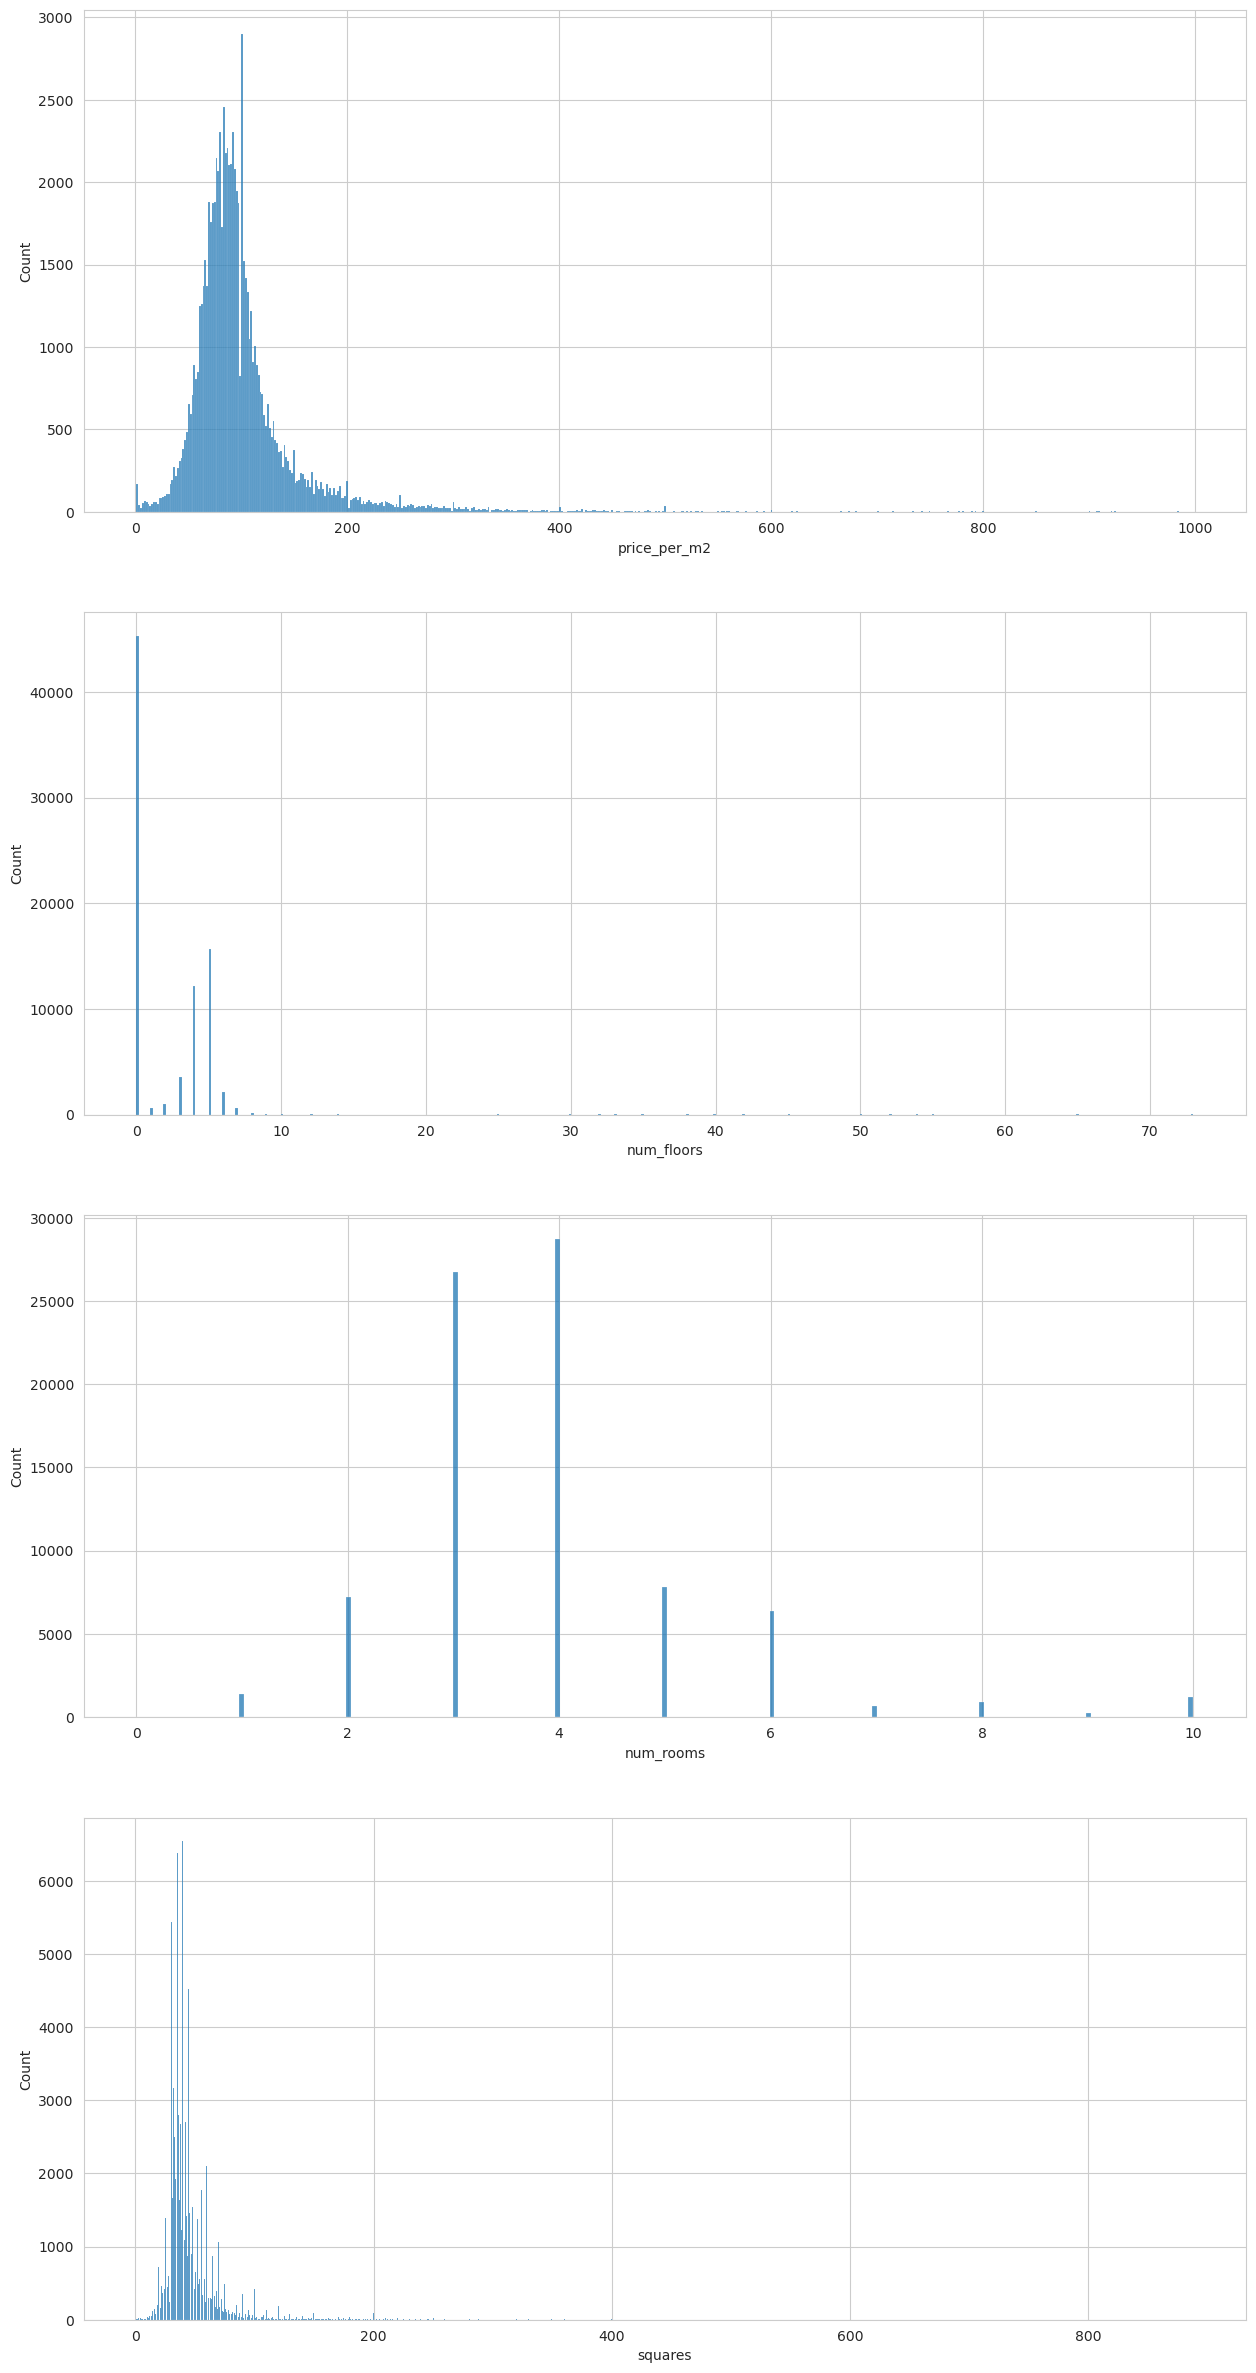

In [16]:
fig, axs = plt.subplots(4)

columns = ['price_per_m2', 'num_floors', 'num_rooms', 'squares', '']
for i, ax in enumerate(axs):
    sns.histplot(x=df[columns[i]], ax=ax)
    
fig.set_size_inches(15, 30)
plt.show()

<h5>Min? max? Are they abnormal?</h5>

In [17]:
num_floors_max = df['num_floors'].max()
num_rooms_max = df['num_rooms'].max()
squares_max = df['squares'].max()
price_per_m2_max = df['price_per_m2'].max()

max_values = [num_floors_max, num_rooms_max, squares_max, price_per_m2_max]

header = ["num_floors(num)", "num_rooms(num)", "squares(m2)", "price_per_m2(VND)"]

max_df = pd.DataFrame(max_values, header, columns=["Max"])
max_df

,Max
num_floors(num),73.0
num_rooms(num),10.0
squares(m2),888.0
price_per_m2(VND),998.0


In [18]:
num_floors_min = df['num_floors'].min()
num_rooms_min = df['num_rooms'].min()
squares_min = df['squares'].min()
price_per_m2_min = df['price_per_m2'].min()

min_values = [num_floors_min, num_rooms_min, squares_min, price_per_m2_min]

header = ["num_floors(num)", "num_rooms(num)", "squares(m2)", "price_per_m2(VND)"]

min_df = pd.DataFrame(min_values, header, columns=["Min"])
min_df

,Min
num_floors(num),0.0
num_rooms(num),0.0
squares(m2),1.0
price_per_m2(VND),1.0


### **7. With each categorical column, how are values distributed?**


In [19]:
categories = df.loc[:,df.dtypes=="object"]
categories

,address,district,town,house_type,paper_type
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Chưa có sổ
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ
3,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ
4,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Chưa có sổ
...,...,...,...,...,...
82487,"Đường Lê Đức Thọ, Phường Mỹ Đình 1, Quận Nam T...",Quận Nam Từ Liêm,Phường Mỹ Đình 1,Nhà phố liền kề,Đã có sổ
82488,"Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc ...",Quận Bắc Từ Liêm,Phường Phúc Diễn,Nhà phố liền kề,Chưa có sổ
82489,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Chưa có sổ
82490,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ


In [29]:
def draw_category_with_offset_limit(category, offset, limit):
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.barplot(x = category.index, y = category.values, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 50)

    ax.set_xlim(offset * 40, limit * 40)
    plt.show()
    

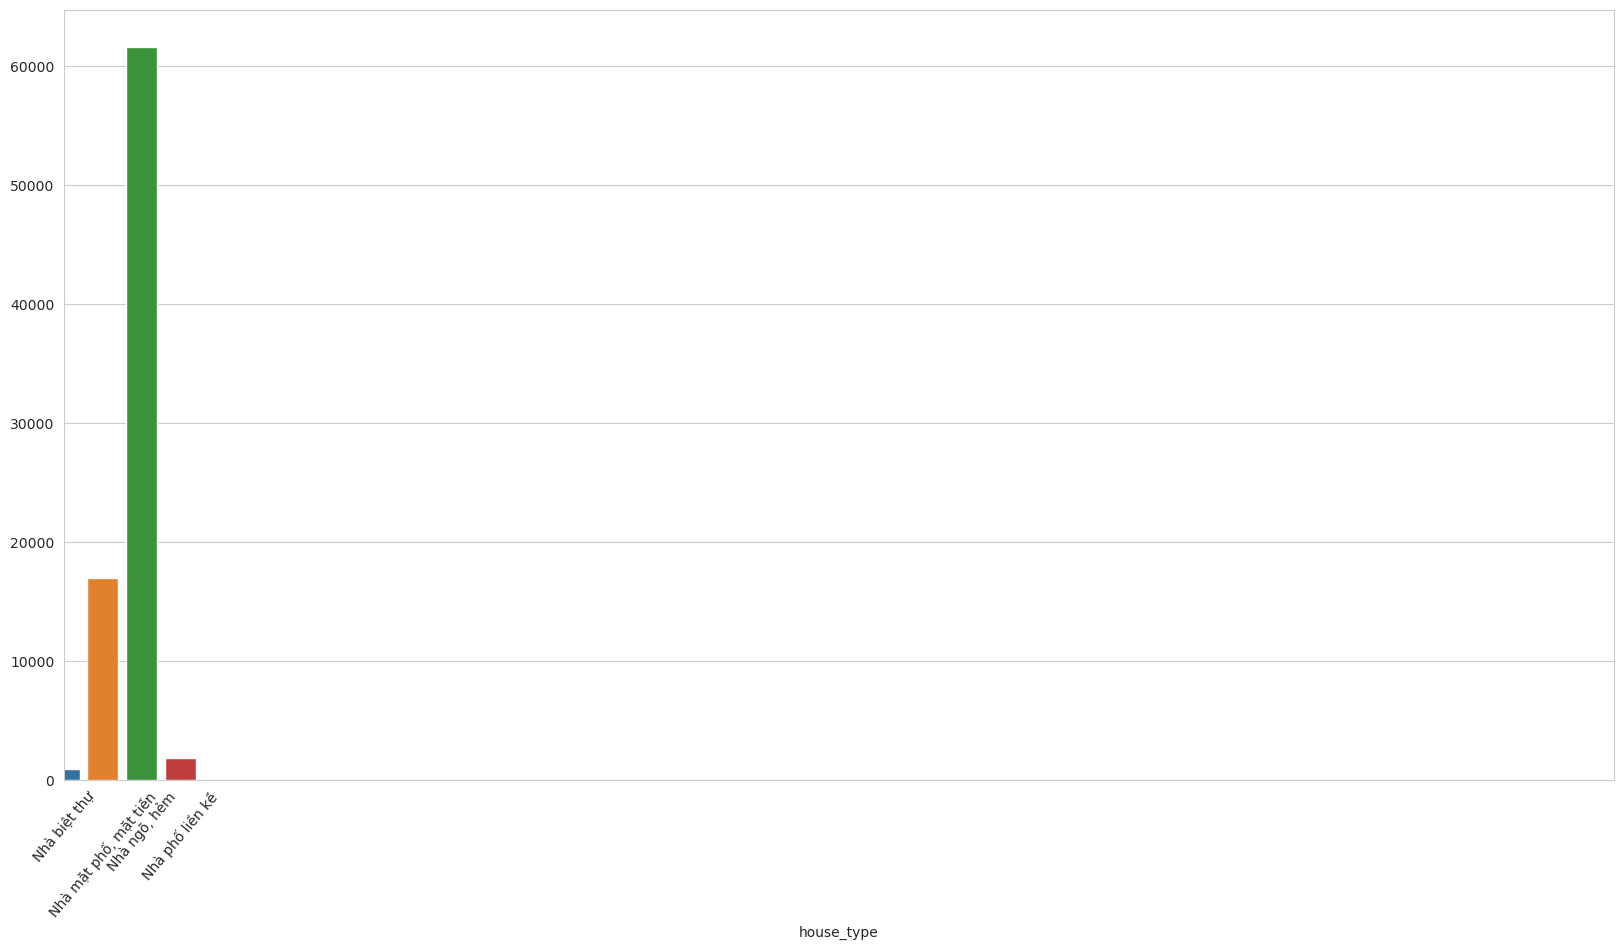

In [30]:
house_type_category = categories.groupby('house_type')["house_type"].count()

draw_category_with_offset_limit(house_type_category, 0, 1)

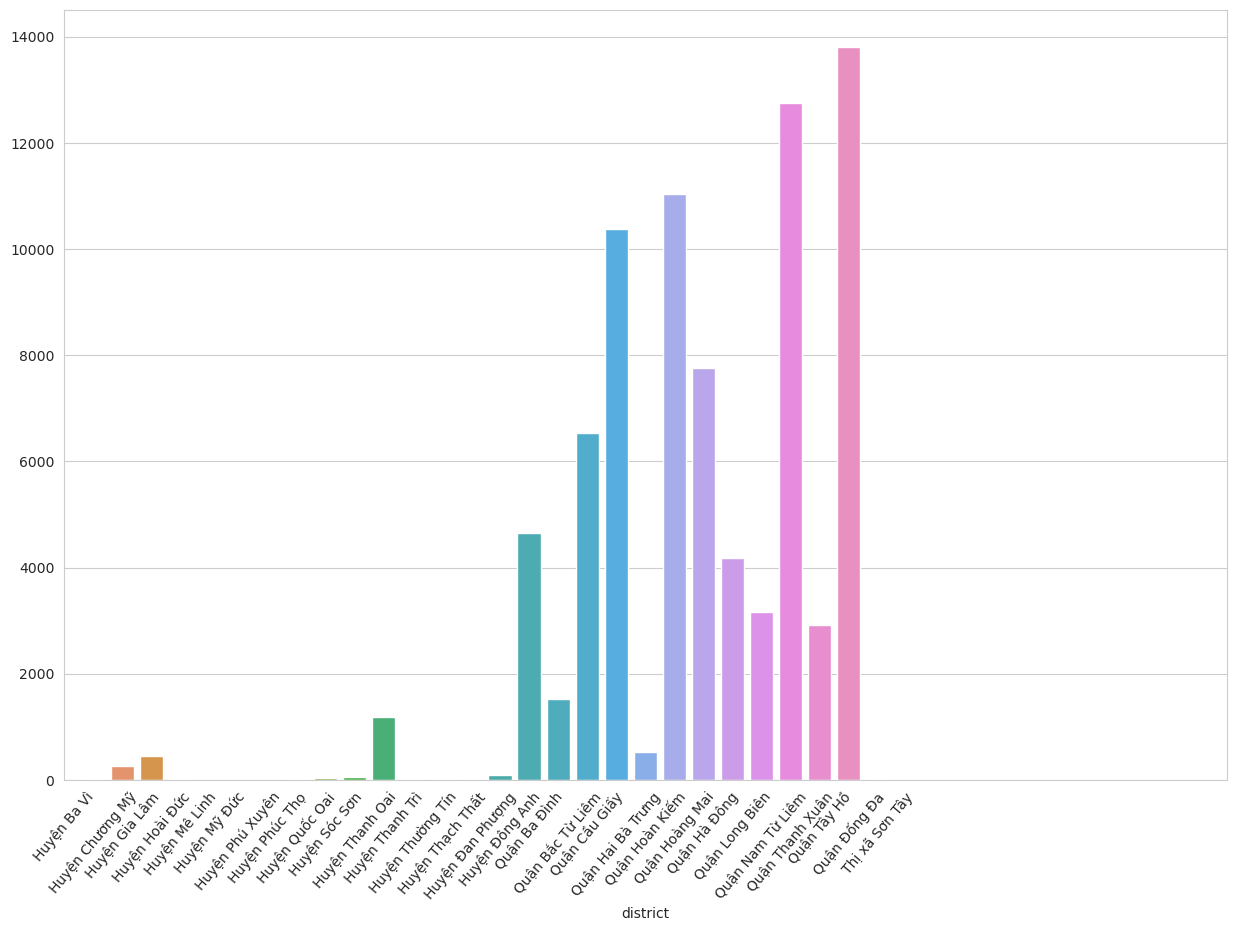

In [22]:
district_category = categories.groupby('district')["district"].count()

draw_category_with_offset_limit(district_category, 0, 1)

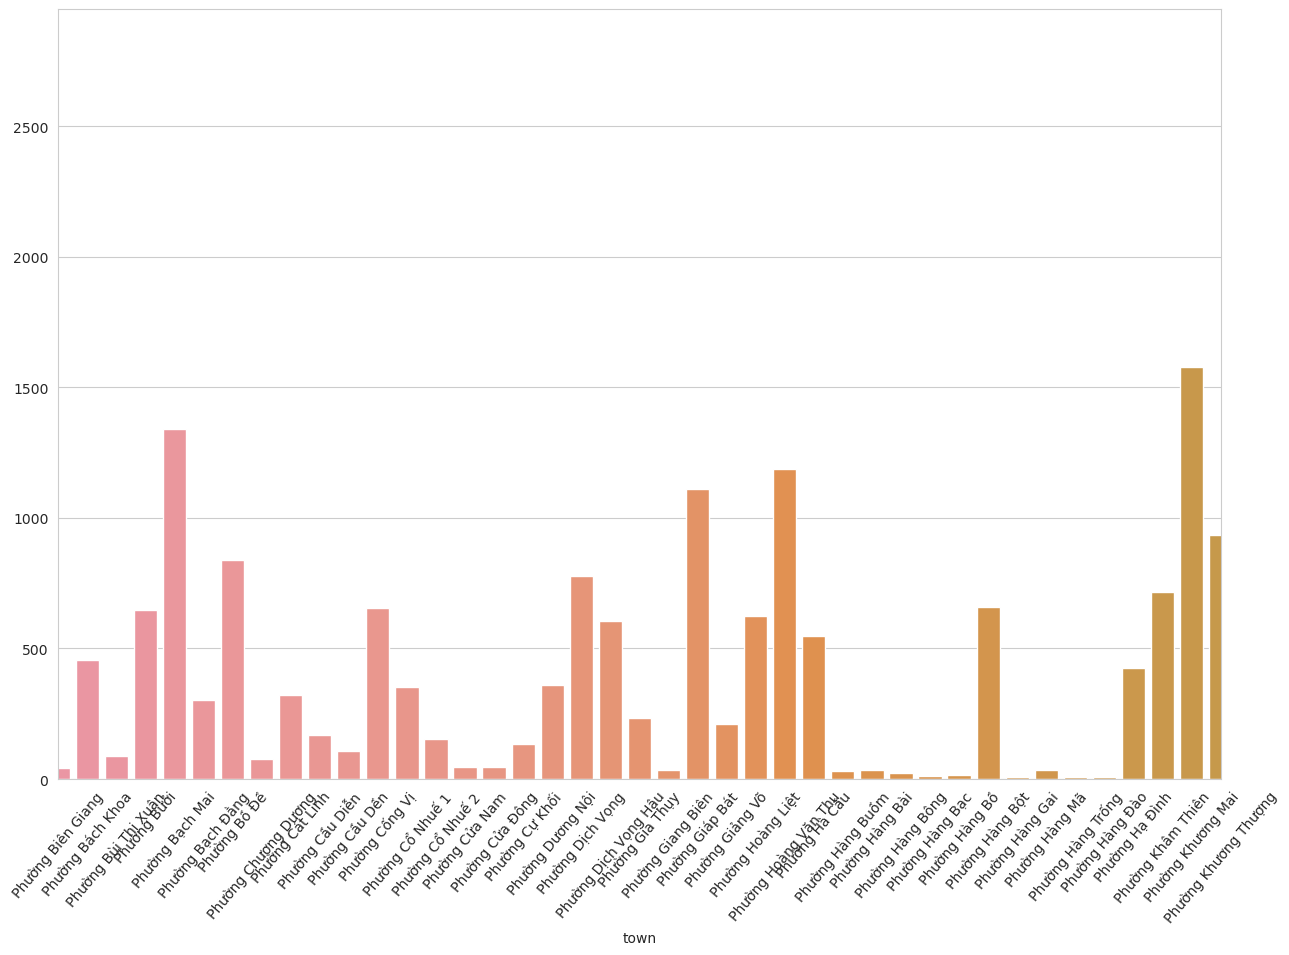

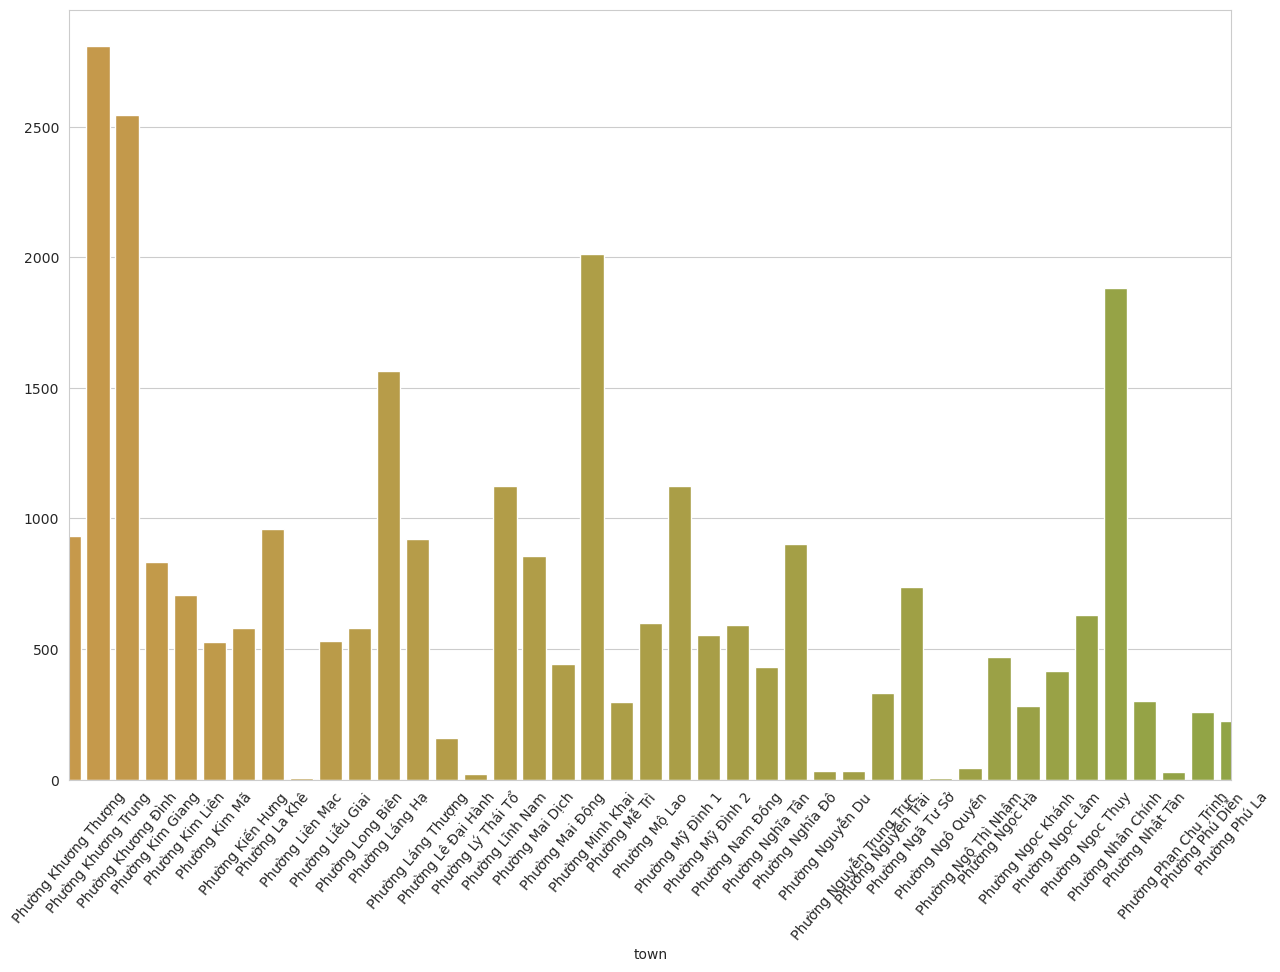

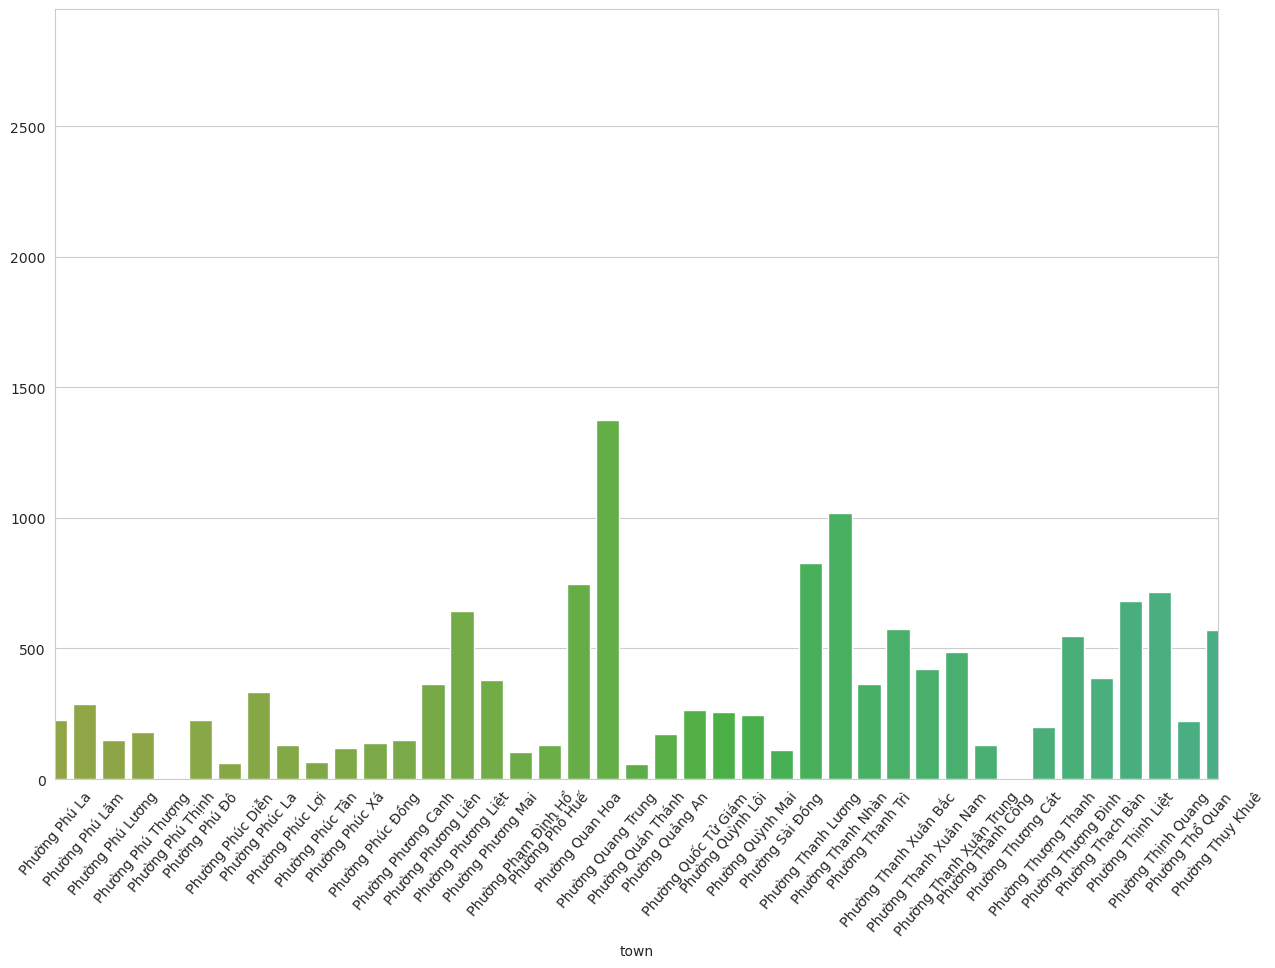

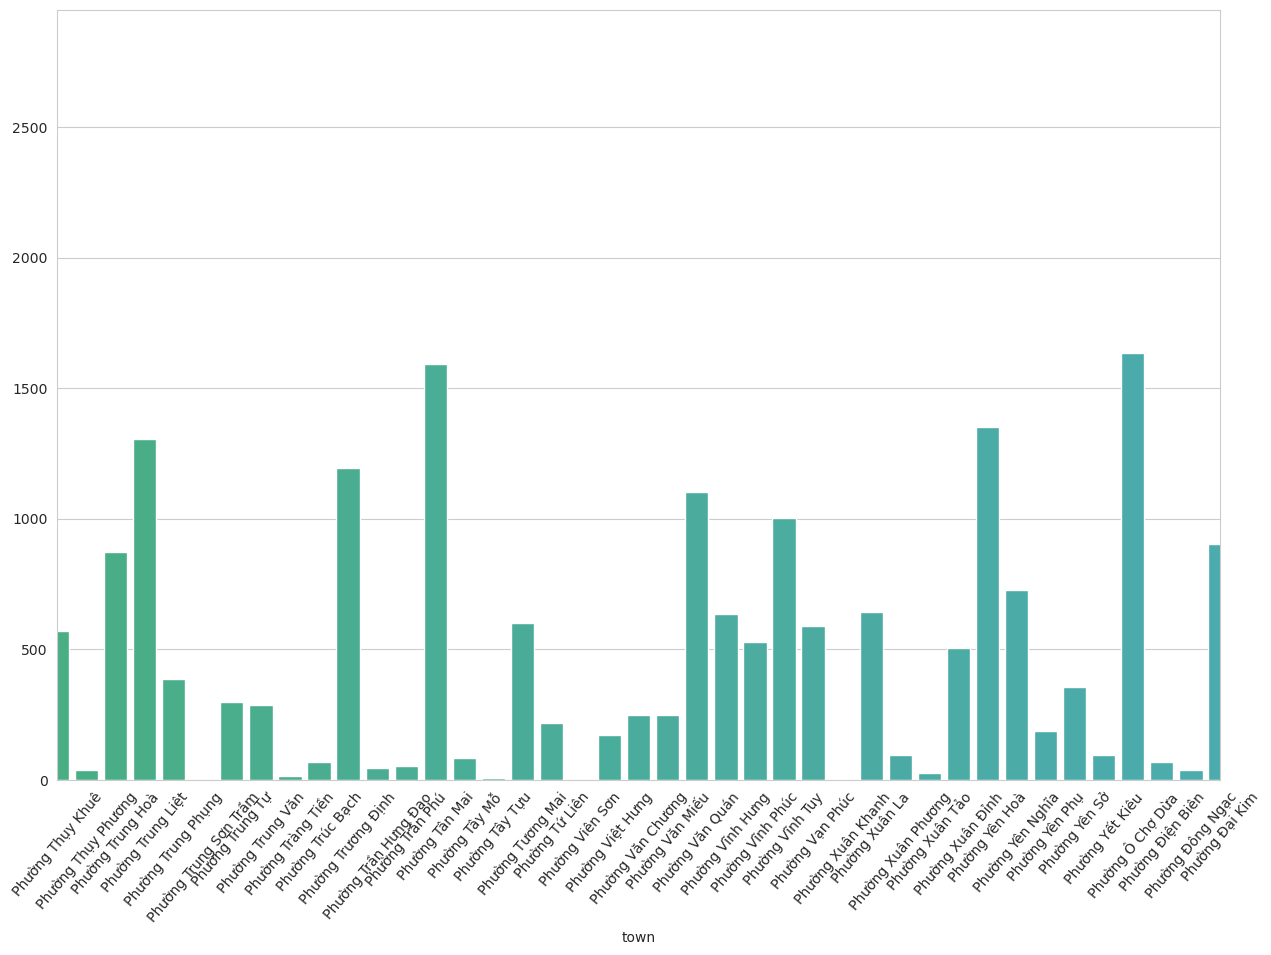

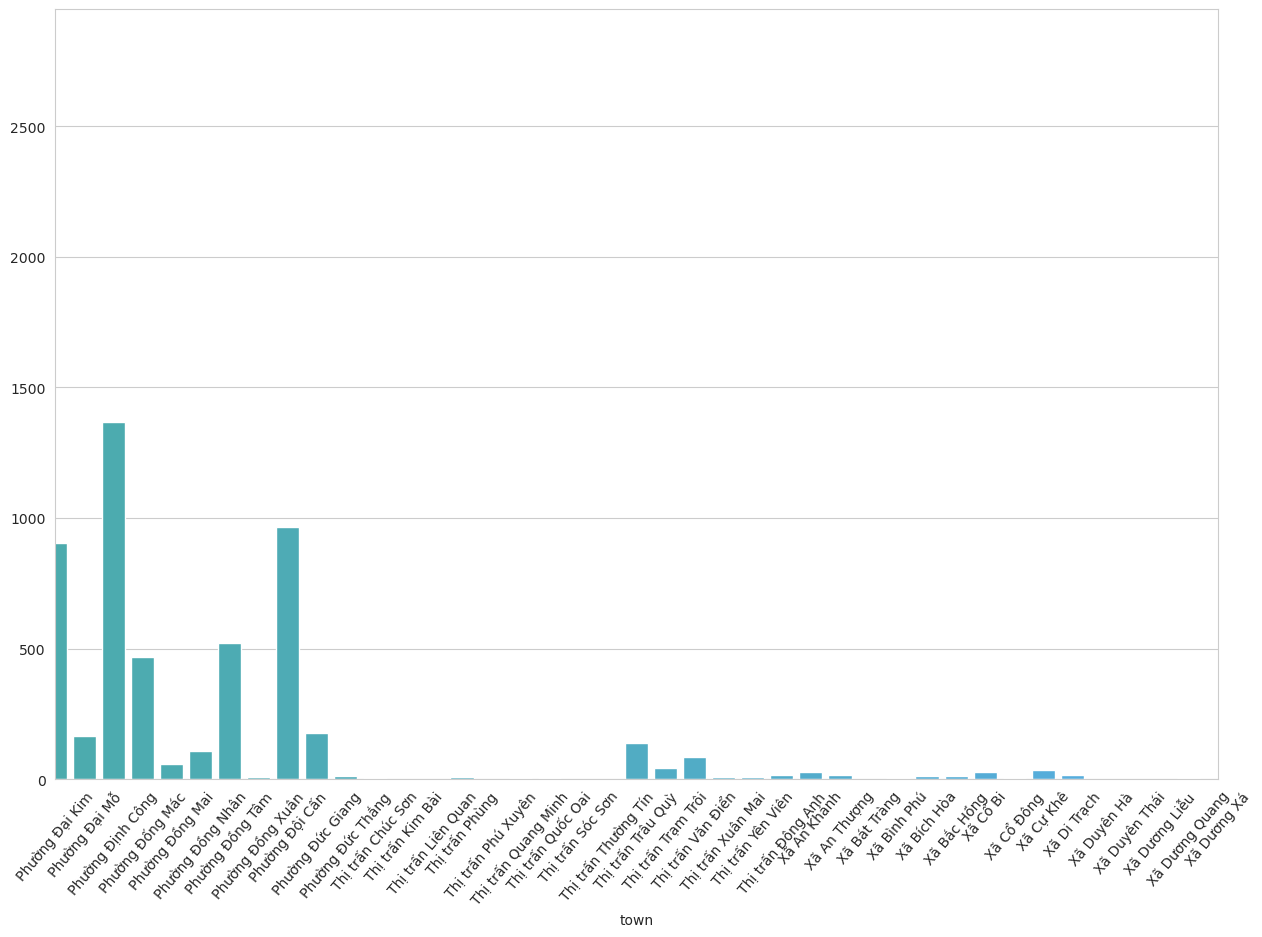

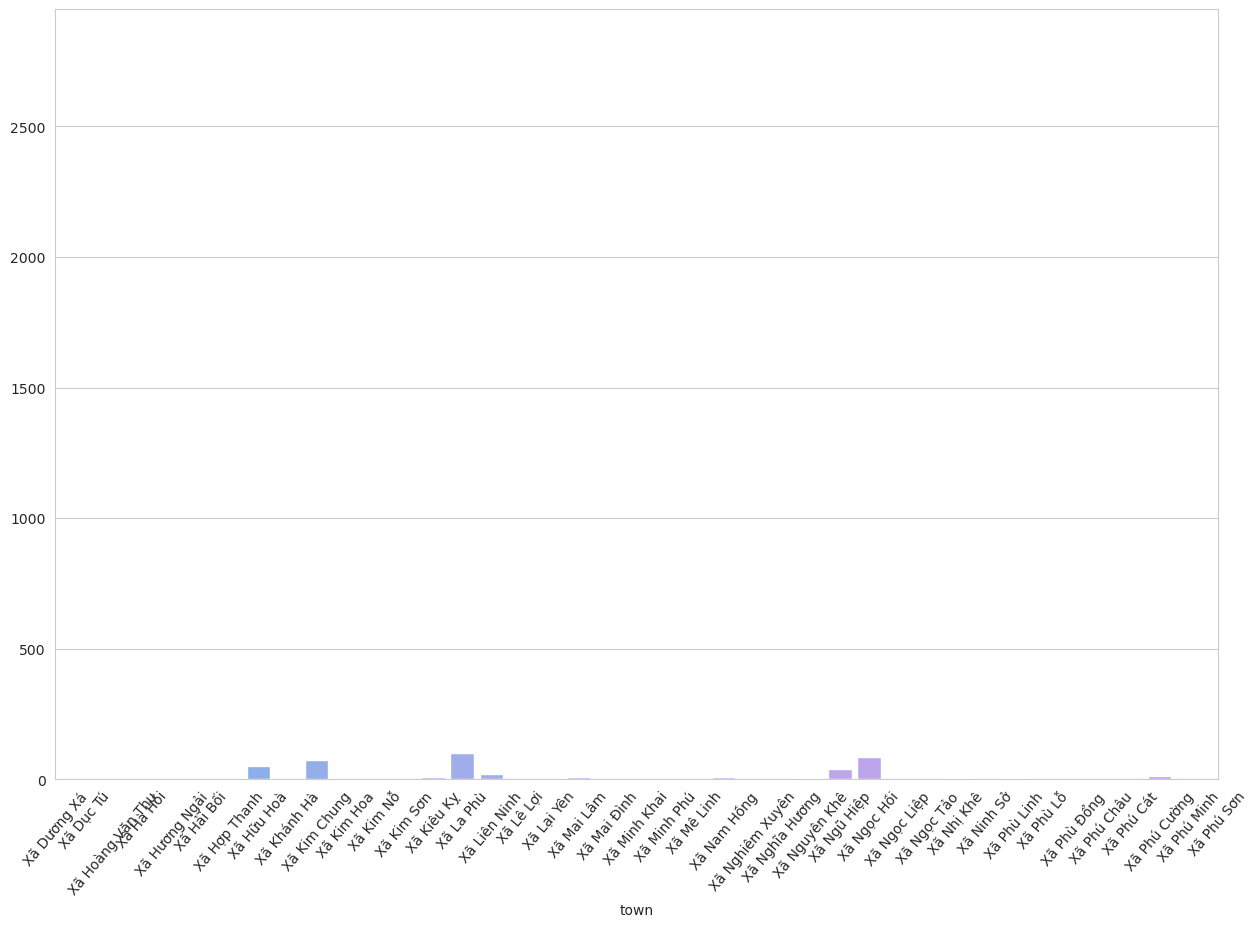

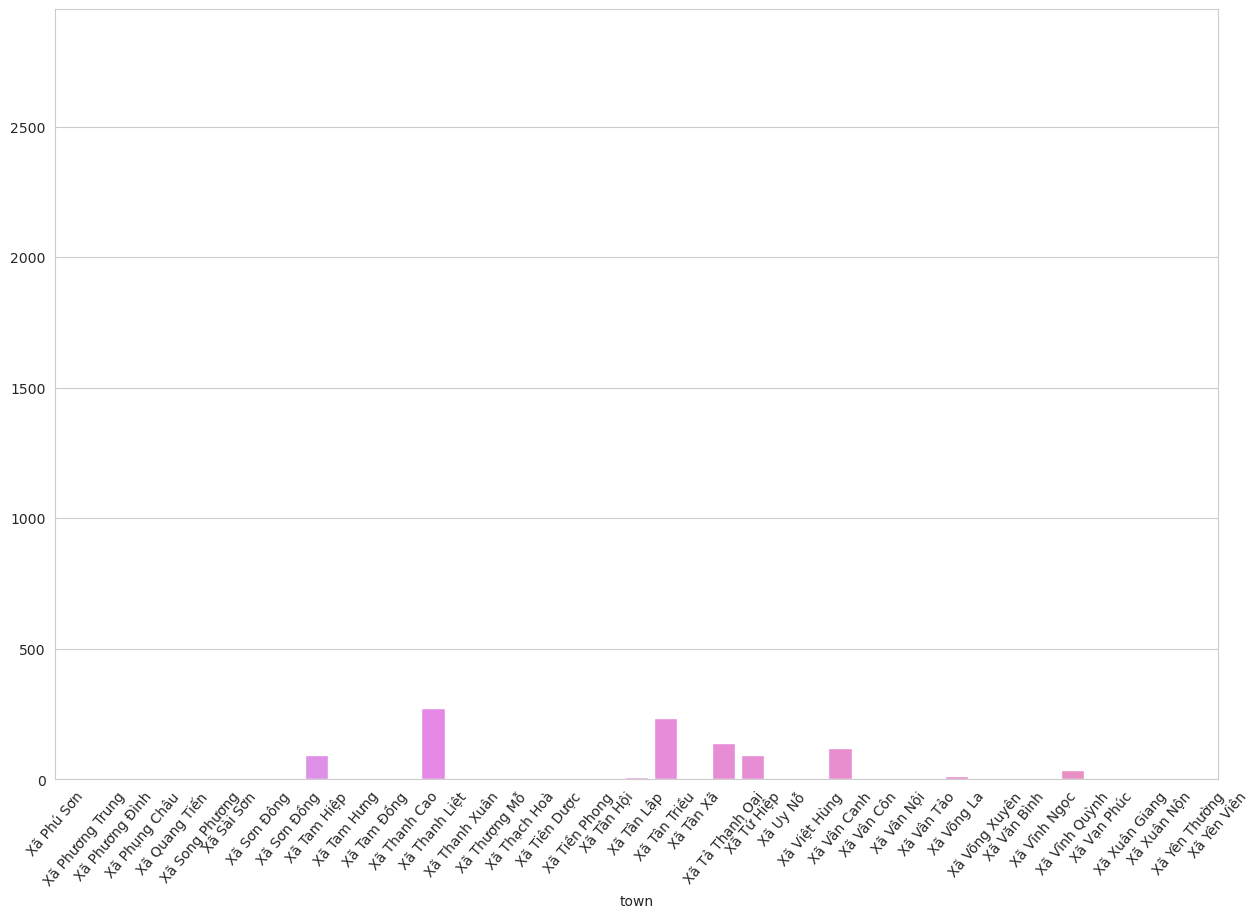

In [23]:
town_category = categories.groupby('town')["town"].count()

draw_category_with_offset_limit(town_category, 0, 1)
draw_category_with_offset_limit(town_category, 1, 2)
draw_category_with_offset_limit(town_category, 2, 3)
draw_category_with_offset_limit(town_category, 3, 4)
draw_category_with_offset_limit(town_category, 4, 5)
draw_category_with_offset_limit(town_category, 5, 6)
draw_category_with_offset_limit(town_category, 6, 7)


### **Save the cleaned data**

In [24]:
df.to_csv("../data/processed/VN_housing_dataset.csv", index=False)